<a href="https://colab.research.google.com/github/Hanzgio/Coder_DataScience/blob/main/Hanz_Herrada_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Subimos los archivos del dataset ContosoSales 
from google.colab import files
 
 
uploaded = files.upload()

Saving Calendar.csv to Calendar.csv
Saving Channel.csv to Channel.csv
Saving FactSales.csv to FactSales.csv
Saving Geography.csv to Geography.csv
Saving Product.csv to Product.csv
Saving ProductCategory.csv to ProductCategory.csv
Saving ProductSubcategory.csv to ProductSubcategory.csv
Saving Promotion.csv to Promotion.csv
Saving Stores.csv to Stores.csv


In [4]:
import pandas as pd

# Cargar las tablas de Contoso Sales
fact_sales = pd.read_csv('FactSales.csv')
channel = pd.read_csv('Channel.csv')
product = pd.read_csv('Product.csv', encoding='Windows-1252')
promotion = pd.read_csv('Promotion.csv')
stores = pd.read_csv('Stores.csv')
geography = pd.read_csv('Geography.csv')
productsubcategory = pd.read_csv('ProductSubcategory.csv')
productcategory = pd.read_csv('ProductCategory.csv')
calendar = pd.read_csv('Calendar.csv', encoding='Windows-1252')

In [5]:
# Revisaremos todas las columnas del dataset, para despues poder unir las tablas
print(fact_sales.columns)

Index(['OrderID', 'DateKey', 'ChannelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'SalesQuantity', 'ReturnQuantity'],
      dtype='object')


In [6]:
print(channel.columns)

Index(['ChannelKey', 'ChannelName'], dtype='object')


In [7]:
print(product.columns)

Index(['ProductKey', 'ProductName', 'ProductDescription',
       'ProductSubcategoryKey', 'Manufacturer', 'BrandName', 'ClassID',
       'ClassName', 'ColorID', 'ColorName', 'Size', 'Weight', 'UnitCost',
       'UnitPrice'],
      dtype='object')


In [8]:
print(promotion.columns)

Index(['PromotionKey', 'PromotionLabel', 'PromotionName', 'DiscountPercent',
       'StartDate', 'EndDate'],
      dtype='object')


In [9]:
print(stores.columns)

Index(['StoreKey', 'GeographyKey', 'StoreType', 'StoreName', 'EmployeeCount',
       'SellingAreaSize'],
      dtype='object')


In [10]:
print(product.columns)

Index(['ProductKey', 'ProductName', 'ProductDescription',
       'ProductSubcategoryKey', 'Manufacturer', 'BrandName', 'ClassID',
       'ClassName', 'ColorID', 'ColorName', 'Size', 'Weight', 'UnitCost',
       'UnitPrice'],
      dtype='object')


In [11]:
print(geography.columns)

Index(['GeographyKey', 'ContinentName', 'RegionCountryName'], dtype='object')


In [12]:
print(productsubcategory.columns)

Index(['ProductSubcategoryKey', 'ProductSubcategoryName',
       'ProductCategoryKey'],
      dtype='object')


In [13]:
print(productcategory.columns)

Index(['ProductCategoryKey', 'ProductCategory'], dtype='object')


In [14]:
print(calendar.columns)

Index(['DateKey', 'Año', 'Mes', 'Nombre Mes', 'Dia', 'Dia Semana Numero',
       'Dia Semana', 'Semestre', 'Cuatrimestre', 'Trimestre', 'Bimestre',
       'Semana', 'Semana W', 'Semana ISO', 'Semana ISO W'],
      dtype='object')


In [15]:
# Haremos el primer merge antes de agregar todas las columnas a fact_sales
productsubcategory = pd.merge(productcategory, productsubcategory, on='ProductCategoryKey')

In [16]:
# Haremos el segundo merge donde agregaremos todas las columnas a fact_sales
stores = pd.merge(stores, geography, on='GeographyKey')
product = pd.merge(product, productsubcategory, on='ProductSubcategoryKey')

In [17]:
# Haremos el tercer merge donde agregaremos todas las columnas a fact_sales
fact_sales = pd.merge(fact_sales, channel, on='ChannelKey')
fact_sales = pd.merge(fact_sales, calendar, on='DateKey')
fact_sales = pd.merge(fact_sales, promotion, on='PromotionKey')
fact_sales = pd.merge(fact_sales, stores, on='StoreKey')
fact_sales = pd.merge(fact_sales, product, on='ProductKey')

In [50]:
# Validamos que en la tabla de fact_sales ya se encuentren todas las columnas del dataset.
print(fact_sales.columns)

Index(['OrderID', 'DateKey', 'ChannelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'SalesQuantity', 'ReturnQuantity', 'ChannelName', 'Año',
       'Mes', 'Nombre Mes', 'Dia', 'Dia Semana Numero', 'Dia Semana',
       'Semestre', 'Cuatrimestre', 'Trimestre', 'Bimestre', 'Semana',
       'Semana W', 'Semana ISO', 'Semana ISO W', 'PromotionLabel',
       'PromotionName', 'DiscountPercent', 'StartDate', 'EndDate',
       'GeographyKey', 'StoreType', 'StoreName', 'EmployeeCount',
       'SellingAreaSize', 'ContinentName', 'RegionCountryName', 'ProductName',
       'ProductDescription', 'ProductSubcategoryKey', 'Manufacturer',
       'BrandName', 'ClassID', 'ClassName', 'ColorID', 'ColorName', 'Size',
       'Weight', 'UnitCost', 'UnitPrice', 'ProductCategoryKey',
       'ProductCategory', 'ProductSubcategoryName', 'PromotionDuration',
       'DiscountFlag'],
      dtype='object')


In [19]:
# Convertimos fact_sales en nuestro data = df
data = df = fact_sales

In [20]:
# Revisamos nuestra data
data

,OrderID,DateKey,ChannelKey,StoreKey,ProductKey,PromotionKey,SalesQuantity,ReturnQuantity,ChannelName,Año,...,ClassName,ColorID,ColorName,Size,Weight,UnitCost,UnitPrice,ProductCategoryKey,ProductCategory,ProductSubcategoryName
0,7077,13/04/2008,1,297,1086,17,9,1,Store,2008,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
1,1557894,13/11/2007,1,297,1086,10,6,0,Store,2007,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
2,1223944,16/08/2007,1,244,1086,9,4,0,Store,2007,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
3,339027,09/06/2007,1,243,1086,1,5,0,Store,2007,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
4,737946,15/05/2007,1,206,1086,1,5,0,Store,2007,...,Economy,11,Grey,3.4 x 4.8 x 3.3,4.8,$139.80,$304.00,4,Cameras and camcorders,Digital SLR Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1222708,05/06/2009,1,262,1399,25,12,0,Store,2009,...,Regular,11,Grey,6 x 6 x 5,8.0,$15.17,$32.99,5,Cell phones,Home & Office Phones
1048571,591684,14/11/2009,1,273,1399,23,13,0,Store,2009,...,Regular,11,Grey,6 x 6 x 5,8.0,$15.17,$32.99,5,Cell phones,Home & Office Phones
1048572,848801,18/09/2009,1,271,1399,1,10,0,Store,2009,...,Regular,11,Grey,6 x 6 x 5,8.0,$15.17,$32.99,5,Cell phones,Home & Office Phones
1048573,1357698,24/11/2009,1,271,1399,23,13,0,Store,2009,...,Regular,11,Grey,6 x 6 x 5,8.0,$15.17,$32.99,5,Cell phones,Home & Office Phones


In [21]:
# Importaremos las librerías que necesitaresmos para realizar los análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

#**OBJETIVO**





El objetivo de este proyecto es mejorar la **productividad** de la compañía en los próximos años mediante el análisis de tres canales comerciales diferentes: ventas, devoluciones y demanda. 

*Para ello, se definieron los siguientes tres objetivos:*

1. Analizar el canal de ventas en línea para identificar oportunidades de mejora y aumentar su rentabilidad. Se busca mejorar la experiencia de compra del cliente en línea, identificar productos que tienen una alta demanda y promoverlos a través de campañas de marketing efectivas.

2. Analizar el canal de devoluciones para reducir su tasa y mejorar la satisfacción del cliente. Se busca identificar las causas principales de las devoluciones, analizar los productos con mayor tasa de devoluciones y proponer soluciones para reducir su incidencia.

3. Analizar la demanda de productos en el canal físico y en línea para optimizar la gestión de inventario y mejorar la eficiencia operativa. Se busca predecir la demanda de productos en ambos canales, identificar patrones estacionales y de tendencias, y optimizar la planificación de la producción y distribución de productos.

Con estos objetivos, se espera que la compañía pueda mejorar su productividad y rentabilidad, al mismo tiempo que ofrece una mejor experiencia de compra a sus clientes y reduce los costos asociados a las devoluciones.

#**ABSTRACTO**



**Introducción:**

En un mercado altamente competitivo, es esencial para las empresas tomar decisiones informadas para mejorar su productividad y mantenerse a la vanguardia. Para lograrlo, es necesario contar con herramientas y estrategias que permitan analizar los datos de la empresa y obtener información relevante que oriente las decisiones futuras. En este proyecto, se han definido tres objetivos enfocados en los canales comerciales de ventas, devoluciones y demanda, con el fin de mejorar la productividad de la compañía para los próximos años.

**Objetivos:**

El primer objetivo de este proyecto es analizar los canales de venta de la empresa y determinar cuál es el canal que tiene un mayor volumen de ventas. Para lograrlo, se examinarán los datos de ventas de cada canal y se utilizará un análisis comparativo para identificar las fortalezas y debilidades de cada uno.

El segundo objetivo es evaluar la tasa de devolución de cada canal comercial para determinar qué canales están generando un mayor número de devoluciones. Este análisis permitirá a la empresa identificar áreas de mejora y tomar medidas para reducir la tasa de devolución en los canales que presenten un mayor índice.

El tercer objetivo de este proyecto es analizar la demanda de los productos de la compañía en diferentes épocas del año. Este análisis permitirá a la empresa anticiparse a las necesidades del mercado y planificar adecuadamente la producción y el abastecimiento de los productos en momentos de alta demanda.

**Audiencia:**

Este proyecto está dirigido a los directivos y tomadores de decisiones de la empresa interesados en mejorar la eficiencia y rentabilidad de los canales comerciales de la compañía. La audiencia incluye a gerentes de ventas, de producción y de finanzas, así como a cualquier persona involucrada en la toma de decisiones estratégicas en la empresa. Este proyecto les brindará información objetiva y relevante para que puedan tomar decisiones informadas y mejorar la productividad y rentabilidad de la empresa.

# **HIPOTESIS**



Con el presente analisis se buscara responder 3 grupos de hipotesis distribuidas de la siguiente manera:


***Grupo 1: Canales de venta***

1.   El canal de venta online tendrán un mayor número de ventas que los canales físicos.
2.   Los canales de venta más utilizados son aquellos que ofrecen mayores descuentos.
3.   Las ventas a través de canales físicos tienen una mayor tasa de devolución que las ventas en línea.

***Grupo 2: Productos***

4.   La categoría de celulares es la que más se han vendido.
5.   Los productos con promociones especiales tienen una tasa de devolución más alta que los productos sin promociones.
6.   La demanda de computadoras varía según la temporada del año.

***Grupo 3: Promociones***

7.   Las promociones que tienen una duración más larga generan más ventas que las promociones de corta duración.
8.   Las promociones en audio tienen un mayor impacto en las ventas totales que en otros productos.
9.   Las promociones tienen un mayor impacto en la cantidad de devoluciones de productos que las ventas regulares.


#**EDA**

#**Exploración General**

Realizaremos una exploración de la data buscando resolver las siguientes preguntas:

*   ¿Cuántas filas y columnas tiene el dataset?
*   ¿Cuáles son los nombres y tipos de las columnas?
*   ¿Hay valores nulos o faltantes?
*   ¿Cuáles son los valores máximos, mínimos y medios de las variables numéricas?

In [54]:
# Dimensiones del dataset
print(fact_sales.shape)

(1048575, 53)


In [55]:
# Nombres de las columnas
print(fact_sales.columns)

Index(['OrderID', 'DateKey', 'ChannelKey', 'StoreKey', 'ProductKey',
       'PromotionKey', 'SalesQuantity', 'ReturnQuantity', 'ChannelName', 'Año',
       'Mes', 'Nombre Mes', 'Dia', 'Dia Semana Numero', 'Dia Semana',
       'Semestre', 'Cuatrimestre', 'Trimestre', 'Bimestre', 'Semana',
       'Semana W', 'Semana ISO', 'Semana ISO W', 'PromotionLabel',
       'PromotionName', 'DiscountPercent', 'StartDate', 'EndDate',
       'GeographyKey', 'StoreType', 'StoreName', 'EmployeeCount',
       'SellingAreaSize', 'ContinentName', 'RegionCountryName', 'ProductName',
       'ProductDescription', 'ProductSubcategoryKey', 'Manufacturer',
       'BrandName', 'ClassID', 'ClassName', 'ColorID', 'ColorName', 'Size',
       'Weight', 'UnitCost', 'UnitPrice', 'ProductCategoryKey',
       'ProductCategory', 'ProductSubcategoryName', 'PromotionDuration',
       'DiscountFlag'],
      dtype='object')


In [56]:
# Tipos de datos de las columnas
print(fact_sales.dtypes)

OrderID                             int64
DateKey                    datetime64[ns]
ChannelKey                          int64
StoreKey                            int64
ProductKey                          int64
PromotionKey                        int64
SalesQuantity                       int64
ReturnQuantity                      int64
ChannelName                        object
Año                                 int64
Mes                                 int64
Nombre Mes                         object
Dia                                 int64
Dia Semana Numero                   int64
Dia Semana                         object
Semestre                           object
Cuatrimestre                       object
Trimestre                          object
Bimestre                           object
Semana                              int64
Semana W                           object
Semana ISO                          int64
Semana ISO W                       object
PromotionLabel                    

In [57]:

# Valores nulos por columna
print(fact_sales.isnull().sum())

OrderID                        0
DateKey                        0
ChannelKey                     0
StoreKey                       0
ProductKey                     0
PromotionKey                   0
SalesQuantity                  0
ReturnQuantity                 0
ChannelName                    0
Año                            0
Mes                            0
Nombre Mes                     0
Dia                            0
Dia Semana Numero              0
Dia Semana                     0
Semestre                       0
Cuatrimestre                   0
Trimestre                      0
Bimestre                       0
Semana                         0
Semana W                       0
Semana ISO                     0
Semana ISO W                   0
PromotionLabel                 0
PromotionName                  0
DiscountPercent                0
StartDate                      0
EndDate                        0
GeographyKey                   0
StoreType                      0
StoreName 

In [58]:

# Estadísticas básicas de las variables numéricas
print(fact_sales.describe())

            OrderID    ChannelKey      StoreKey    ProductKey  PromotionKey  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   7.827654e+05  1.626341e+00  1.963188e+02  8.813583e+02  8.500063e+00   
std    4.520318e+05  1.028064e+00  9.554673e+01  5.092229e+02  8.261262e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    3.913595e+05  1.000000e+00  1.210000e+02  4.530000e+02  1.000000e+00   
50%    7.826100e+05  1.000000e+00  2.000000e+02  8.800000e+02  4.000000e+00   
75%    1.174146e+06  2.000000e+00  2.960000e+02  1.273000e+03  1.400000e+01   
max    1.565796e+06  4.000000e+00  3.100000e+02  2.517000e+03  2.800000e+01   

       SalesQuantity  ReturnQuantity           Año           Mes  \
count   1.048575e+06    1.048575e+06  1.048575e+06  1.048575e+06   
mean    1.616121e+01    1.427490e-01  2.007836e+03  6.592530e+00   
std     3.964399e+01    3.595981e-01  8.170012e-01  3.415338e+00   
min     4.000000

# Grupo 1: Canales de venta


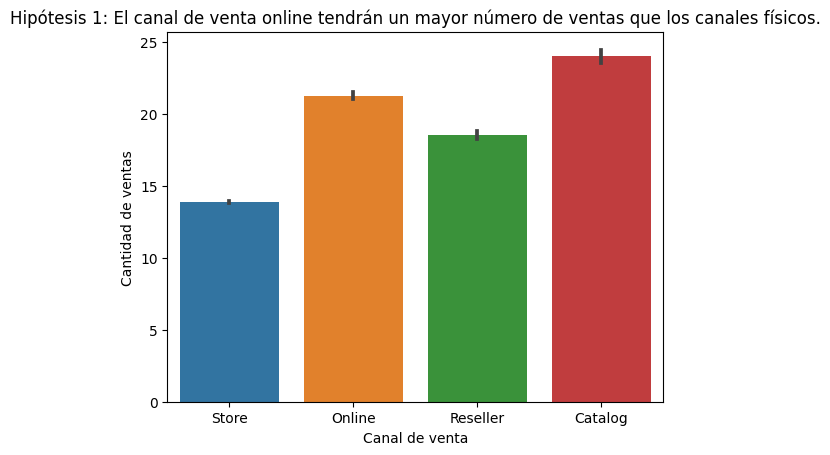

In [22]:
sns.barplot(x="ChannelName", y="SalesQuantity", data=df)
plt.title("Hipótesis 1: El canal de venta online tendrán un mayor número de ventas que los canales físicos.")
plt.xlabel('Canal de venta')
plt.ylabel('Cantidad de ventas')
plt.show()

Con esta grafica podemos inferir que nuestra primer hipotesis es **falsa**, ya que venta por catalogo es el canal que tiene el mayor número de ventas.

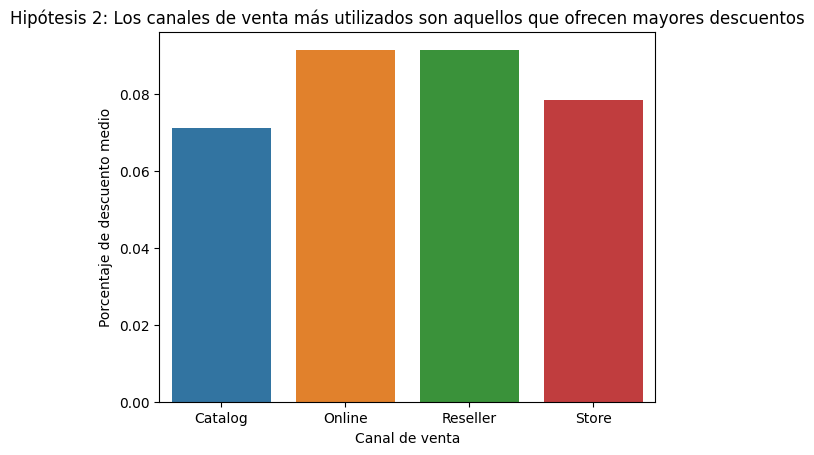

In [23]:
# Crear el DataFrame con los datos necesarios
data = df[['ChannelName', 'DiscountPercent']]

# Calcular el porcentaje de descuento medio para cada canal de venta
mean_discounts = data.groupby('ChannelName').mean()

# Crear la gráfica de barras
sns.barplot(x=mean_discounts.index, y='DiscountPercent', data=mean_discounts)

# Establecer títulos y etiquetas
plt.title('Hipótesis 2: Los canales de venta más utilizados son aquellos que ofrecen mayores descuentos')
plt.xlabel('Canal de venta')
plt.ylabel('Porcentaje de descuento medio')
plt.show()

La hipótesis se **cumple en** **parte**, ya que aunque el canal "Catálogo" tiene el mayor volumen de ventas, no es el que tiene mayores descuentos. En cambio, el canal "Online" tiene mayores descuentos y se encuentra en la segunda posición en términos de ventas. Por otro lado, el canal "Reseller" tiene el mismo porcentaje de descuentos que "Online", pero se encuentra en la tercera posición en términos de ventas.

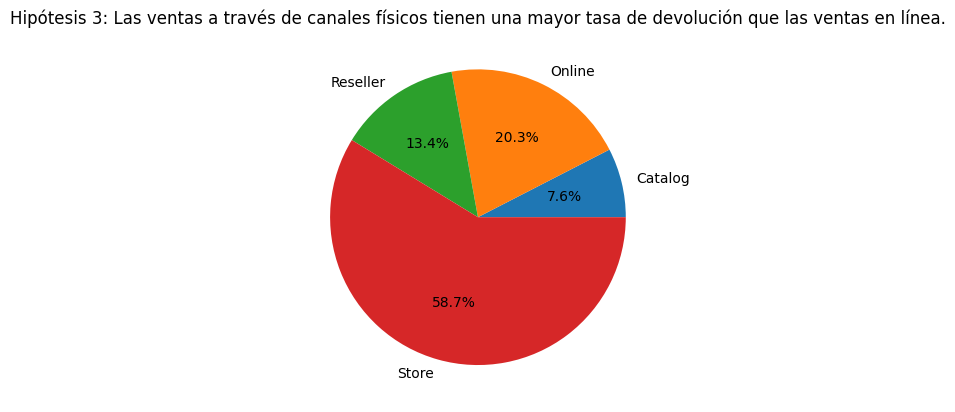

In [24]:
# Crear el DataFrame con los datos necesarios
data = fact_sales.groupby('ChannelName').agg({'ReturnQuantity': 'sum'})

# Crear la gráfica de sectores
plt.pie(data['ReturnQuantity'], labels=data.index, autopct='%1.1f%%')
plt.title('Hipótesis 3: Las ventas a través de canales físicos tienen una mayor tasa de devolución que las ventas en línea.')
plt.show()

La hipótesis es **verdader**a, los canales fisicos en este caso Store tiene la mayor tasa de devolución de todos los canales.

# Grupo 2: Productos

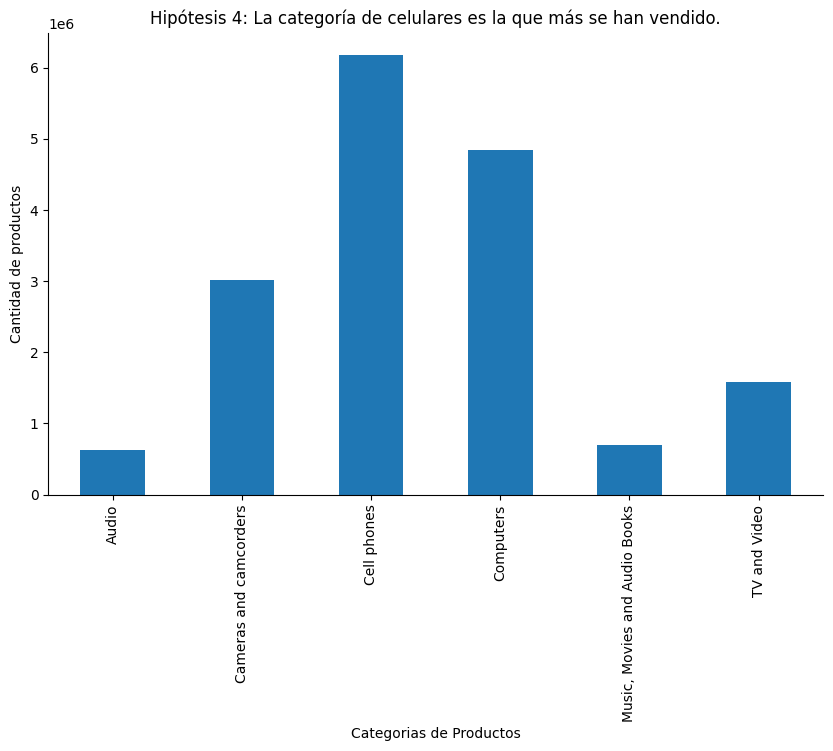

In [31]:
# Agrupar los datos por categoría de producto y sumar las cantidades vendidas
grouped = fact_sales.groupby('ProductCategory')['SalesQuantity'].sum()

# Crear la figura y el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', ax=ax)

# Añadir un título y ajustar los bordes
ax.set_title('Hipótesis 4: La categoría de celulares es la que más se han vendido.')
ax.set_ylabel('Cantidad de productos')
ax.set_xlabel('Categorias de Productos')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

La hipótesis es **verdadera**, la categoría que más se ha vendido es la de celulares.

<ipython-input-32-238a0ccf2ad7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped.index, rotation=45, ha='right')


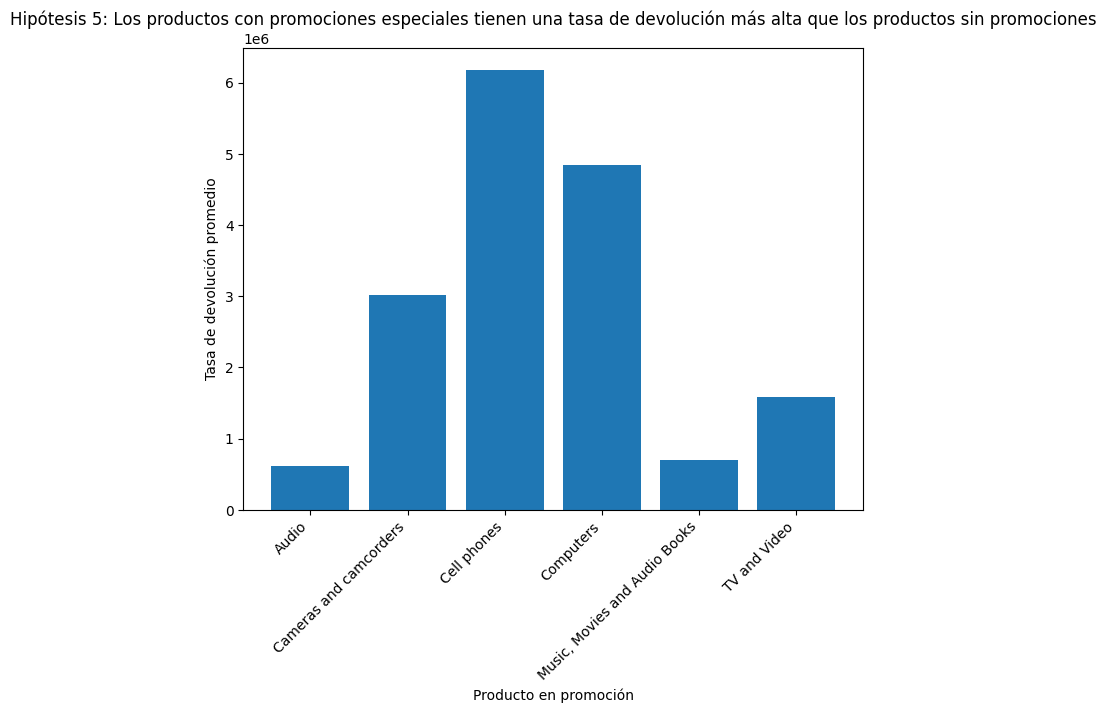

In [32]:
# Crear la figura y el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped.index, grouped.values)

# Rotar las etiquetas del eje x
ax.set_xticklabels(grouped.index, rotation=45, ha='right')

# Añadir etiquetas y títulos al gráfico
ax.set_xlabel('Producto en promoción')
ax.set_ylabel('Tasa de devolución promedio')
ax.set_title('Hipótesis 5: Los productos con promociones especiales tienen una tasa de devolución más alta que los productos sin promociones')
plt.show()

La hipotesis es **verdadera**, las devoluciones son mas altas cuando hay promociones especiales.

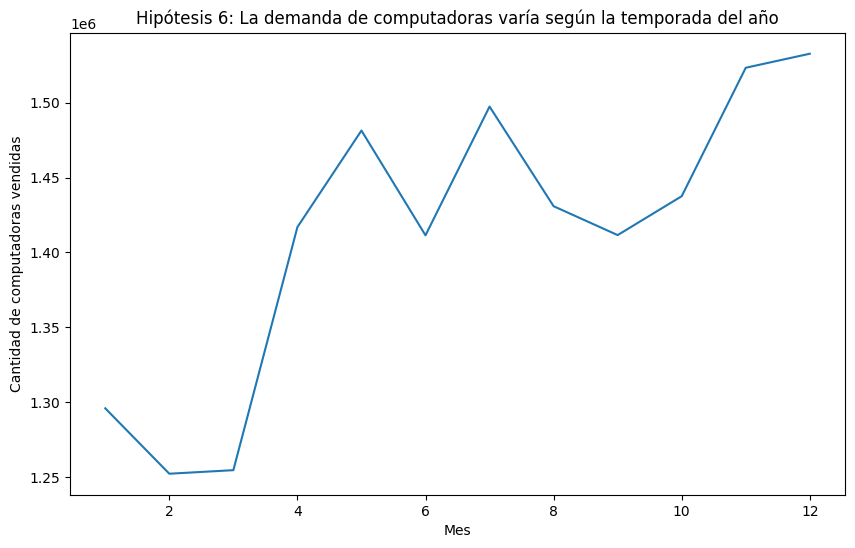

In [33]:
# Convertir la columna DateKey en un objeto datetime
fact_sales['DateKey'] = pd.to_datetime(fact_sales['DateKey'])

# Agrupar los datos por mes y sumar las cantidades vendidas
grouped = fact_sales.groupby(fact_sales['DateKey'].dt.month)['SalesQuantity'].sum()

# Crear la figura y el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(grouped.index, grouped.values)

# Añadir etiquetas y títulos al gráfico
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de computadoras vendidas')
ax.set_title('Hipótesis 6: La demanda de computadoras varía según la temporada del año')
plt.show()

La hipótesis es **correcta**, la demanda de computadoras no es fija, fluctua mes a mes, siendo los ultimos 2 meses del año la temporada de mayores ventas.

# Grupo 3: Promociones

In [34]:
#Creamos la variable de duracion de la promocion
fact_sales['StartDate'] = pd.to_datetime(fact_sales['StartDate'])
fact_sales['EndDate'] = pd.to_datetime(fact_sales['EndDate'])
fact_sales['PromotionDuration'] = fact_sales['EndDate'] - fact_sales['StartDate']

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/04/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '31/01/2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/09/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '31/12/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [39]:
fact_sales['DateKey'] = pd.to_datetime(fact_sales['DateKey'], format="%d/%m/%Y")

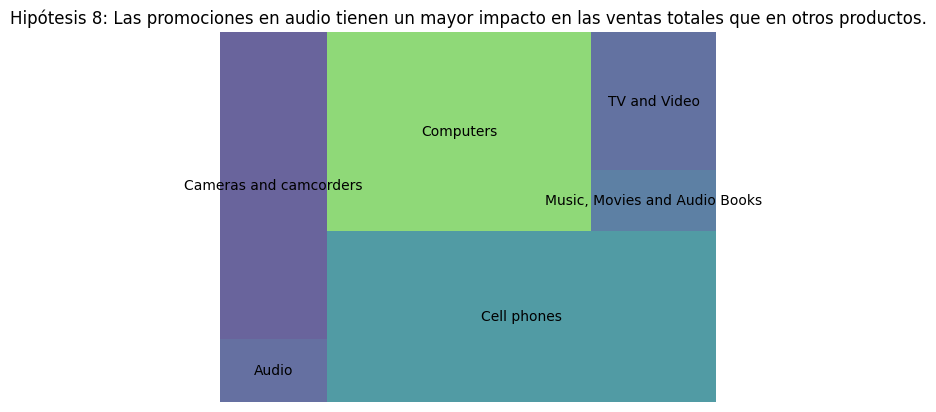

In [45]:
# Filtrar el dataframe fact_sales para incluir solamente las filas que corresponden a ventas realizadas durante un periodo de promoción
fact_sales_promotions = fact_sales[fact_sales['DiscountFlag'] == 1]

# Agregar una columna con la suma de las ventas para cada categoría
fact_sales_promotions_sum = fact_sales_promotions.groupby(['ProductCategory']).sum().reset_index()

# Crear el treemap
squarify.plot(sizes=fact_sales_promotions_sum['SalesQuantity'], label=fact_sales_promotions_sum['ProductCategory'], alpha=.8 )
plt.axis('off')
plt.title('Hipótesis 8: Las promociones en audio tienen un mayor impacto en las ventas totales que en otros productos.')
plt.show()

Esta hipótesis es **falsa**, la categoria de audio es la que se vende menos en temporadas de promociones.

In [44]:
import squarify

In [42]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


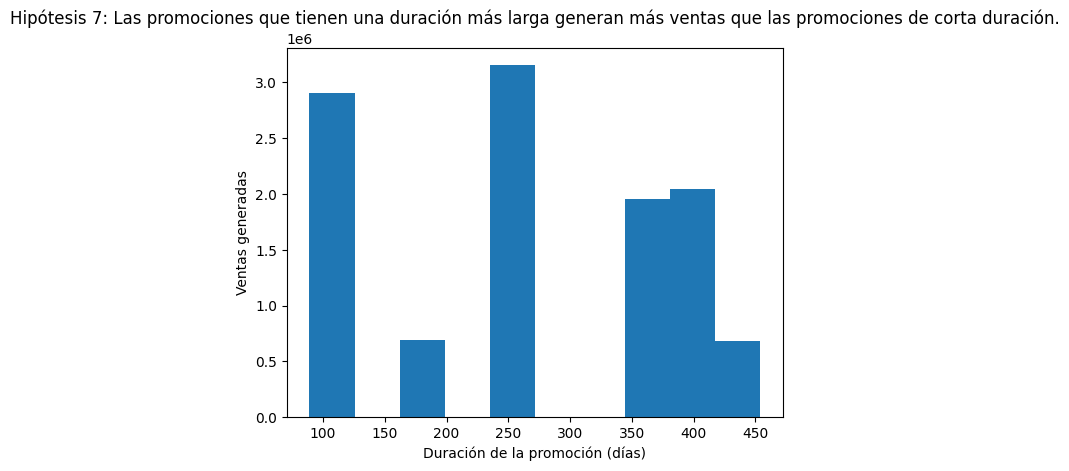

In [37]:
# Filtrar el dataframe fact_sales para incluir solamente las filas que corresponden a ventas realizadas durante un periodo de promoción
fact_sales_promotions = fact_sales[fact_sales['DiscountFlag'] == 1]

# Crear un histograma para visualizar la relación entre la duración de las promociones y las ventas generadas
plt.hist(fact_sales_promotions['PromotionDuration'].dt.days, bins=10, weights=fact_sales_promotions['SalesQuantity'])

# Añadir un título y etiquetas a los ejes
plt.title('Hipótesis 7: Las promociones que tienen una duración más larga generan más ventas que las promociones de corta duración.')
plt.xlabel('Duración de la promoción (días)')
plt.ylabel('Ventas generadas')
plt.show()

  Esta hipótesis es **falsa**, ya que el la promocion que duro 250 dias fue la que genero el mayor numero de ventas, y no es la promoción que duro más dias.

In [36]:
fact_sales['DiscountFlag'] = (fact_sales['PromotionName'] != 'No Discount').astype(int)

In [35]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


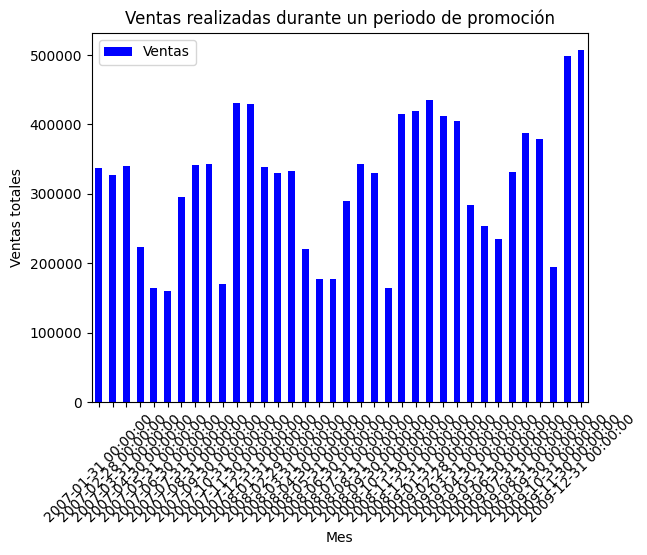

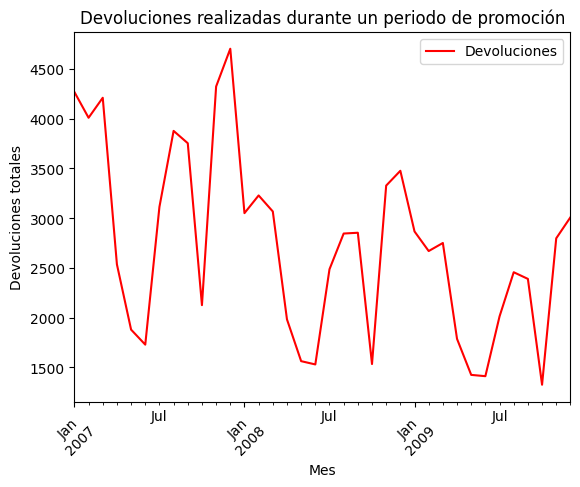

In [63]:
# Filtrar el dataframe fact_sales para incluir solamente las filas que corresponden a ventas realizadas durante un periodo de promoción
fact_sales_promotions = fact_sales[fact_sales['DiscountFlag'] == 1]

# Agrupar las ventas y devoluciones por mes
sales_by_month = fact_sales_promotions.groupby(pd.Grouper(key='DateKey', freq='M')).agg({'SalesQuantity': 'sum', 'ReturnQuantity': 'sum'}).reset_index()

# Crear figura y ejes para el gráfico de ventas
fig, ax1 = plt.subplots()

# Graficar ventas en barras en el primer eje
sales_by_month.plot(kind='bar', x='DateKey', y='SalesQuantity', ax=ax1, color='blue')

# Configurar los ejes
ax1.set_xlabel('Mes')
ax1.set_ylabel('Ventas totales')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(['Ventas'], loc='upper left')
plt.title('Ventas realizadas durante un periodo de promoción')

# Crear figura y ejes para el gráfico de devoluciones
fig, ax2 = plt.subplots()

# Graficar devoluciones en línea en el primer eje
sales_by_month.plot(kind='line', x='DateKey', y='ReturnQuantity', ax=ax2, color='red')

# Configurar los ejes
ax2.set_xlabel('Mes')
ax2.set_ylabel('Devoluciones totales')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(['Devoluciones'], loc='upper right')
plt.title('Devoluciones realizadas durante un periodo de promoción')

plt.show()

La hipótesis es **verdadera,** ya que las ventas siguen siendo mayores que las devoluciones.

#**Resumen Ejecutivo**

En general, los resultados indican que las hipótesis planteadas en el análisis tienen una mezcla de verdades y falsedades. 

En cuanto a los canales de venta, la venta por catálogo tiene el mayor volumen de ventas, pero no tiene los mayores descuentos, siendo el canal online el que ofrece los mayores descuentos y el tercero en términos de ventas. Los canales físicos, en particular la tienda, tienen una tasa de devolución mayor que los canales en línea. En cuanto a las categorías de productos, la categoría de celulares es la que más se vende.

Por otro lado, las promociones especiales tienen una tasa de devolución más alta que los productos sin promociones, lo cual sugiere que es necesario realizar una evaluación cuidadosa de las promociones antes de implementarlas. La demanda de computadoras varía según la temporada del año, con los últimos dos meses del año siendo la temporada de mayores ventas. Además, se encontró que la promoción que tuvo una duración de 250 días generó el mayor número de ventas, lo que sugiere que la duración de las promociones no necesariamente se correlaciona con el aumento de ventas. Finalmente, se encontró que la categoría de audio tiene un impacto menor en las ventas durante las temporadas de promoción.

En resumen, estos hallazgos pueden ser útiles para mejorar la estrategia de ventas de la empresa, enfocándose en los canales en línea, reduciendo la tasa de devolución de productos promocionales, adaptando la oferta de productos a la temporada del año, y considerando la duración de las promociones y su impacto en las ventas.